<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Importing-libraries-and-Loading-Data" data-toc-modified-id="Importing-libraries-and-Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing libraries and Loading Data</a></span></li><li><span><a href="#One-Hot-Encoding-Categorical-Variables" data-toc-modified-id="One-Hot-Encoding-Categorical-Variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>One-Hot Encoding Categorical Variables</a></span></li><li><span><a href="#Model-Fitting" data-toc-modified-id="Model-Fitting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Fitting</a></span><ul class="toc-item"><li><span><a href="#Creating-Training-Dataset-and-Testing-Dataset" data-toc-modified-id="Creating-Training-Dataset-and-Testing-Dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Creating Training Dataset and Testing Dataset</a></span></li><li><span><a href="#Multiple-Linear-Regression-Model" data-toc-modified-id="Multiple-Linear-Regression-Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Multiple Linear Regression Model</a></span></li><li><span><a href="#Ridge-Regression-Model" data-toc-modified-id="Ridge-Regression-Model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Ridge Regression Model</a></span></li><li><span><a href="#Random-Forest-Regression-Model" data-toc-modified-id="Random-Forest-Regression-Model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Random Forest Regression Model</a></span></li><li><span><a href="#XGBoost-Regression-Model" data-toc-modified-id="XGBoost-Regression-Model-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>XGBoost Regression Model</a></span></li><li><span><a href="#Hyper-Parameter-Tuning" data-toc-modified-id="Hyper-Parameter-Tuning-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Hyper-Parameter Tuning</a></span></li></ul></li><li><span><a href="#Model-Performance-on-Testing-Data" data-toc-modified-id="Model-Performance-on-Testing-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Performance on Testing Data</a></span><ul class="toc-item"><li><span><a href="#Ridge-Regression-Evaluation" data-toc-modified-id="Ridge-Regression-Evaluation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Ridge Regression Evaluation</a></span></li><li><span><a href="#Random-Forest-Evaluation" data-toc-modified-id="Random-Forest-Evaluation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Random Forest Evaluation</a></span></li><li><span><a href="#XGBoost-(Hyper-Tuned)-Regression-Evaluation" data-toc-modified-id="XGBoost-(Hyper-Tuned)-Regression-Evaluation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>XGBoost (Hyper-Tuned) Regression Evaluation</a></span></li><li><span><a href="#Conclusions-Drawn" data-toc-modified-id="Conclusions-Drawn-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Conclusions Drawn</a></span></li></ul></li><li><span><a href="#Saving-Best-Model" data-toc-modified-id="Saving-Best-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Saving Best Model</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></div>

# Objectives

 The objectives of this notebook, in sequential order, are:
 
 1. __to convert the nominal categorical to numerical form via One-Hot encoding.__
 2. __to train different models on the cleaned data set obtained after exploratory data analysis (EDA).__ 
 3. __evaluate the performance of different models and choose the best one.__
 4. __tune hyper parameters of the best model to get the best results possible.__
 5. __benchmark the performance of models on testing data.__
 6. __store best model in a binary format which would be used in deployment of model using Flask API.__
 

The raw data has been cleaned as per the insights gained after exploratory data analysis (EDA). The only modification required is conversion of nominal categorical variables to numerical ones. After this conversional, we are good to build different machine learning models and evaluate their performance.

# Importing libraries and Loading Data

First, we set up the enviornment for the notebook. 

In [1]:
# turning off warnings for the notebook
import warnings
warnings.filterwarnings('ignore')

# importing sklearn for model building
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
# importing time to get processing time 
# for hyper parameter tuning using GridSearchCV
import time

#for manipulating data frame and plotting purpose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing pickle to store the final model in a binary format for later use
import pickle

# displaying all the columns and row throughout the notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Then we load cleaned data obtained from exploratory data analysis (EDA) in dataframe df.

In [2]:
df_rentfaster = pd.read_csv("rentfaster_scraped_data_posteda.csv")
df = df_rentfaster.copy()

In [3]:
df.iloc[:20]
# checking the dataframe by looking at the first 50 rows

,Neighbourhood,Pets,Tenant_Parking,Building_features,Property_features,Listing_Type,Sq_Feet,Baths,Beds,Rent_Monthly,Fulldescription_len
0,Skyview,1,1,2,7,Apartment,873,1.0,2,1433,1019
1,Skyview,1,1,2,7,Apartment,1015,2.0,2,1499,1019
2,Skyview,1,1,2,7,Apartment,946,2.0,1,1348,1019
3,Skyview,1,1,2,7,Apartment,878,1.0,2,1435,1019
4,Taradale,0,1,2,14,Condo,960,2.0,2,1350,315
5,West Hillhurst,0,0,0,19,House,800,1.0,2,1750,1210
6,Varsity,0,0,22,15,Condo,1100,1.5,1,1500,784
7,Skyview,1,1,2,7,Apartment,678,1.0,1,1199,985
8,Skyview,1,1,2,7,Apartment,981,2.0,2,1350,985
9,Skyview,1,1,2,7,Apartment,676,1.0,1,1222,985


In [4]:
# checking dimensions of dataframe
df.shape

(1681, 11)

# One-Hot Encoding Categorical Variables

One-hot encoding of the nominal categorical variables is implemented with the help of pandas .get_dummies. This is necessary as model fitting requires that the input be in numerical format (For more on One-Hot encoding <a href="https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding" target="_blank"> refer this link </a>). This is the only modification required before we can proceed to model building.



In [5]:
Listing_Type_Dummies = pd.get_dummies(df['Listing_Type'], prefix = 'Listing_Type' )
Neighbourhood_Dummies = pd.get_dummies(df['Neighbourhood'], prefix = 'Neighbourhood' )

The generated dummy columns are added back to the original dataframe with the help of .concat

In [6]:
df = pd.concat([df, Listing_Type_Dummies], axis=1)
df = pd.concat([df, Neighbourhood_Dummies], axis=1)

We can drop *Neighbourhood* and *Listing_Type* column as they have already been converted to numerical format as per one-hot encoding.

In [7]:
df.drop(['Neighbourhood', 'Listing_Type'], axis=1, inplace=True)

In [8]:
df.iloc[:20]
# checking first 20 rows

,Pets,Tenant_Parking,Building_features,Property_features,Sq_Feet,Baths,Beds,Rent_Monthly,Fulldescription_len,Listing_Type_Apartment,Listing_Type_Basement,Listing_Type_Condo,Listing_Type_Duplex,Listing_Type_House,Listing_Type_Loft,Listing_Type_Main,Listing_Type_Shared,Listing_Type_Townhouse,Neighbourhood_-1,Neighbourhood_Acadia,Neighbourhood_Albert Park,Neighbourhood_Altadore,Neighbourhood_Applewood,Neighbourhood_Arbour Lake,Neighbourhood_Aspen Woods,Neighbourhood_Banff Trail,Neighbourhood_Bankview,Neighbourhood_Bayview,Neighbourhood_Beddington,Neighbourhood_Beltline,Neighbourhood_Bowness,Neighbourhood_Braeside,Neighbourhood_Brentwood,Neighbourhood_Briar Hill,Neighbourhood_Bridgeland,Neighbourhood_Canyon Meadows,Neighbourhood_Capitol Hill,Neighbourhood_Carrington,Neighbourhood_Castleridge,Neighbourhood_Cedarbrae,Neighbourhood_Charleswood,Neighbourhood_Chinook Park,Neighbourhood_Citadel,Neighbourhood_Cityscape,Neighbourhood_Cliff Bungalow,Neighbourhood_Coach Hill,Neighbourhood_Connaught,Neighbourhood_Copperfield,Neighbourhood_Coral Springs,Neighbourhood_Cornerstone,Neighbourhood_Cougar Ridge,Neighbourhood_Country Hills,Neighbourhood_Country Hills Village,Neighbourhood_Coventry Hills,Neighbourhood_Crescent Heights,Neighbourhood_Crestmont,Neighbourhood_Currie Barracks,Neighbourhood_Dalhousie,Neighbourhood_Dover,Neighbourhood_Dover Glen,Neighbourhood_Downtown,Neighbourhood_East Village,Neighbourhood_Eau Claire,Neighbourhood_Edgemont,Neighbourhood_Elboya,Neighbourhood_Erin Woods,Neighbourhood_Erlton,Neighbourhood_Evanston,Neighbourhood_Evergreen,Neighbourhood_Fairview,Neighbourhood_Falconridge,Neighbourhood_Fonda,Neighbourhood_Forest Heights,Neighbourhood_Forest Lawn,Neighbourhood_Garrison Green,Neighbourhood_Garrison Woods,Neighbourhood_Glamorgan,Neighbourhood_Glenbrook,Neighbourhood_Glendale,Neighbourhood_Greenview,Neighbourhood_Hamptons,Neighbourhood_Harvest Hills,Neighbourhood_Hawkwood,Neighbourhood_Haysboro,Neighbourhood_Highland Park,Neighbourhood_Highwood,Neighbourhood_Hillhurst,Neighbourhood_Huntington Hills,Neighbourhood_Inglewood,Neighbourhood_Kelvin Grove,Neighbourhood_Killarney,Neighbourhood_Kincora,Neighbourhood_Kingsland,Neighbourhood_Lake Bonavista,Neighbourhood_Lakeview,Neighbourhood_Lincoln Park,Neighbourhood_Lower Mount Royal,Neighbourhood_Manchester,Neighbourhood_Marlborough,Neighbourhood_Marlborough Park,Neighbourhood_Martindale,Neighbourhood_Mayland Heights,Neighbourhood_McKenzie Towne,Neighbourhood_Mckenzie Towne,Neighbourhood_Meadowlark Park,Neighbourhood_Midnapore,Neighbourhood_Millrise,Neighbourhood_Mission,Neighbourhood_Monterey Park,Neighbourhood_Montgomery,Neighbourhood_Mount Pleasant,Neighbourhood_Mount Royal,Neighbourhood_Mountview Parc,Neighbourhood_New Brighton,Neighbourhood_Nolan Hill,Neighbourhood_North Glenmore Park,Neighbourhood_Oakridge,Neighbourhood_Ogden,Neighbourhood_Palliser,Neighbourhood_Panorama Hills,Neighbourhood_Parkdale,Neighbourhood_Parkhill-Stanley Park,Neighbourhood_Patterson,Neighbourhood_Penbrooke Meadows,Neighbourhood_Pineridge,Neighbourhood_Quarry Park,Neighbourhood_Queensland,Neighbourhood_Radisson Heights,Neighbourhood_Ramsay,Neighbourhood_Ranchlands,Neighbourhood_Red Carpet,Neighbourhood_Redstone,Neighbourhood_Regal Terrace,Neighbourhood_Renfrew,Neighbourhood_Richmond/Knob Hill,Neighbourhood_Riverbend,Neighbourhood_Rocky Ridge,Neighbourhood_Rosedale,Neighbourhood_Rosscarrock,Neighbourhood_Royal Oak,Neighbourhood_Rundle,Neighbourhood_Rutland Park,Neighbourhood_Saddle Ridge,Neighbourhood_Sage Hill,Neighbourhood_Sandstone,Neighbourhood_Savanna,Neighbourhood_Scarboro,Neighbourhood_Shaganappi,Neighbourhood_Shawnessy,Neighbourhood_Shepard,Neighbourhood_Sherwood,Neighbourhood_Signal Hill,Neighbourhood_Skyview,Neighbourhood_South Calgary,Neighbourhood_Southview,Neighbourhood_Southwood,Neighbourhood_Springbank Hill,Neighbourhood_Spruce Cliff,Neighbourhood_Stanley Park,Neighbourhood_Strathcona Park,Neighbourhood_Sunalta,Neighbourhood_Sunnyside,Neighbourhood_Taradale,Neighbourhood_Temple

The dataframe is in correct format for model building now. 

# Model Fitting

Next, we start building models. The dataset is broken into independent variables (i.e. X) and dependant variable (i.e. Y). Here, we want to predict the monthly rent therefore, monthly rent is the dependent variable. All the explanatory variables are the features and thus, they are stored in X. Note that X and y are numpy arrays here (since we are using .values here).

In [9]:
X = df.drop(['Rent_Monthly'], axis=1).values
y = df.Rent_Monthly.values

## Creating Training Dataset and Testing Dataset 

The dataset is split in training and test dataset in a 80:20 split ratio by calling train_test_split.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
X_train.shape

(1344, 181)

Training dataset is 80% of total dataset (i.e 1681 rows)

## Multiple Linear Regression Model

In the block of code below, we fit a multiple linear regression model to set a baseline model to compare against. 

In [12]:
lm = LinearRegression()
lm.fit(X_train, y_train);

K-Fold Cross validation helps in generalizing the model and prevents overfitting. For more on K-Fold Cross validation <a href="https://towardsdatascience.com/cross-validation-430d9a5fee22" target="_blank"> refer this link </a>.  This technique can be used to get better models even if the amount of training data is less. 

cross_val_score returns the score for different sub-splits of data. Here the model is  multiple linear regression (lm) and scoring criteria is mean_absolute_error. The dataset is split in 10 subsets (CV). 

In [13]:
cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 10)

array([-1.75878271e+08, -2.29754214e+09, -1.79209422e+02, -4.04926595e+09,
       -5.38290457e+09, -2.08120333e+02, -3.17051607e+09, -1.68644109e+09,
       -7.70857345e+08, -5.05557297e+10])

On performing cross validation we can see that the linear model is overfitting on the dataset. The mean_absolute_error is varying by orders of magnitudes in between different data subsets. This absupt shift suggest that the linear model has overfit.

This kind of behaviour is expected in a sparse data set like we have. Out of the total 181 columns, 175 are due to one-hot encoding and therefore, they are sparse (i.e. they are mostly 0 or 1 sometimes). Therefore, multiple linear regression is clearly not a good model for predicting montly rent.

## Ridge Regression Model

Next, we apply Ridge regression model on the dataset. The rational here is that ridge regression penalises large coefficients in model equation (which was why cross_val_score of linear model varied so much) and therefore prevents overfitting. I didn't want to push the coefficients to zero as well and therefore, I didn't use Lasso regression as it has a tendency to do so.

In [14]:
ri = Ridge(random_state = 0)
np.mean(cross_val_score(ri, X_train, y_train, scoring = 'neg_mean_absolute_error'))

-211.42605202894265

In [15]:
np.std(cross_val_score(ri, X_train, y_train, scoring='neg_mean_absolute_error'))

15.84724624970808

The default value for subsets (i.e. cv) in cross_val_score is 5. In order to gauge the performance of model we take the mean and standard deviation of all 5 returned cross_val_score's. It can be seen that Ridge regression performs better that Multiple Linear regression as it gives more stable/consistent parameters (apparent from low standard deviation of ~$15 only) and prevents over-fitting by penalizing large coefficients. (For more on ridge regression <a href="https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b" target="_blank"> refer this link </a>)

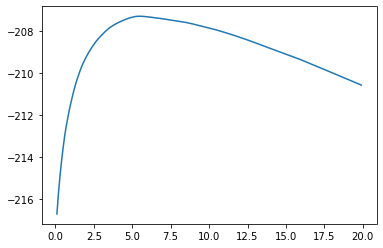

In [16]:
#ref: https://github.com/PlayingNumbers/ds_salary_proj/blob/master/model_building.py
alpha = []
error = []

for i in range(1,200):
    alpha.append(i/10)
    ri = Ridge(alpha=(i/10))
    error.append(np.mean(cross_val_score(ri, X_train, y_train, scoring = 'neg_mean_absolute_error')))
    
plt.plot(alpha,error);

In the above plot, we can see how the neg_mean_absolute_error varries as per the change in values of alpha (which is a hyperparameter). We observe that the error is least when alpha ~5.

In [17]:
ri = Ridge(random_state = 0, alpha = 5)
np.mean(cross_val_score(ri, X_train, y_train, scoring = 'neg_mean_absolute_error'))

-207.32336316727674

However, the reduction in error value after parameter tuning is only ~4$ and therefore, not significant.

## Random Forest Regression Model

Since the data is sparse, decision tree based ensemble methods would also work well for our dataset. Therefore, I fit Random Forest model on my data and checked its performance.

In [18]:
rf = RandomForestRegressor(random_state = 0)
np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error')) 

-177.58322282943635

In [19]:
np.std(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error'))

8.717635509025358

Due to the non-linear dependance of dependent variable on explanatory variable, Random Forest performed better than Ridge regression. The mean_absolute_error is lesser (177) and the standard deviation between different cross validation subsets is also less (8).

## XGBoost Regression Model

XGBoost is an ensemble based, gradient boosted model that is similar to Random Forest. It is a state of the art machine learning model which is optimized for performance and accuracy (for more <a href="https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d#:~:text=What%20is%20XGBoost%3F,all%20other%20algorithms%20or%20frameworks." target="_blank"> refer this link </a>).  

In [20]:
xg = XGBRegressor()
np.mean(cross_val_score(xg, X_train, y_train, scoring='neg_mean_absolute_error'))

-175.87001315765983

In [21]:
np.std(cross_val_score(xg, X_train, y_train, scoring='neg_mean_absolute_error'))

5.911221197234148

On performing cross validation we can see the mean value of different cross validations (i.e. 175) and the standard deviation (i.e. 6) is the least here. Therefore, this is the best model so far for our dataset and next, the hyper paramters of this model can be tuned with the help of GridSearchCV to get the best model possible. 

## Hyper-Parameter Tuning

I tried hyperparameter tuning using GridSearchCV (for more <a href="https://towardsdatascience.com/grid-search-for-hyperparameter-tuning-9f63945e8fec" target="_blank"> refer this link </a>). GridSearchCV tests all combinations of hyper parameteres and tests which model returns the highest score as per scoring criteria. The improvement in mean_absolute_error from 175 to 173 was not significant and thus, it didn't make sense to hyper tune more than 3 variables already done here.

In [22]:
# for timing code execution
# start = time.time()
# end = time.time()
# start-end

parameters = {'learning_rate': [0.1], 'max_depth': [8], 'n_estimators': [225]}

gs = GridSearchCV(xg,parameters,scoring='neg_mean_absolute_error', n_jobs = -1)
gs.fit(X_train,y_train);

In [23]:
gs.best_score_

-173.55843726270692

The model with the best predictions has the following parameters: 

In [24]:
xg = gs.best_estimator_
gs.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=225, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Model Performance on Testing Data

In order to get the true performance metrics for different models, we need to check the mean_absolute_error of each model's prediction against unseen data to prevent the problem of data leakage (for more <a href="https://towardsdatascience.com/data-leakage-in-machine-learning-10bdd3eec742" target="_blank"> refer this link </a>). Therefore, I checked the performance of each model on the test dataset.

## Ridge Regression Evaluation

In [25]:
ri.fit(X_train,y_train)
y_pred_ri = ri.predict(X_test)
print(mean_absolute_error(y_test,y_pred_ri))

210.21959643282722


## Random Forest Evaluation

In [26]:
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(mean_absolute_error(y_test,y_pred_rf))

172.45982801018633


## XGBoost (Hyper-Tuned) Regression Evaluation

In [27]:
xg.fit(X_train,y_train)
y_pred_xg = xg.predict(X_test)
print(mean_absolute_error(y_test,y_pred_xg))

160.3417627351574


## Conclusions Drawn

From the  mean absolute error of predictions on testing dataset, we can say that XGBoost is the best model and it can on an average predict the value of monthly rent correct to within $160 of the actual value. This model is now saved for use during deployment and productionizing phase of the project.

#    Saving Best Model

The best performing model is XGBoost and it is saved as a binary object with the help of pickle library. This binary object can later be used to give predictions for input paramaters.

In [29]:
with open('xg_model.pkl','wb') as modelFile:
     pickle.dump(xg,modelFile)
with open('xg_model.pkl','rb') as modelFile:
      model = pickle.load(modelFile)

The saved pickle file is opened using .load and and using .predict, the model generates prediction for monthly rent for any given input parameters.

In [30]:
model.predict(X_test[3,:].reshape(1,-1))

array([1458.6804], dtype=float32)

The predicted amount returned is ~$1458

In [31]:
# for debugging during flask api implementation
# df.iloc[0:10, 88]
# df['Fulldescription_len'].describe()

# Next Steps

The best model is saved as a binary file. The next step of this project is aimed at building a user facing interface with the help of Flask API and HTML and then deploying it on local webserver. If everything looks good, the final step would be to deploy the model on cloud servers using services such as Heroku and AWS EC2 instance. This end product would predict monthly rent for the City of Calgary and would be freely accessible to anyone online.

For the link to Flask API Code (<a href="https://github.com/RahulNagial/Regression_Analysis" target="_blank">refer app.py file</a>)